## Serializing the data

In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

## 定义数据

In [2]:
x = np.linspace(-5,5,50)
real_y = x*[3.4]+1
y = real_y + np.random.normal(0,2,(50,))

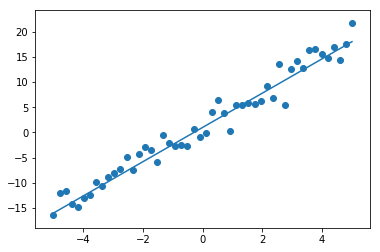

In [3]:
plt.plot(x, real_y)
plt.scatter(x,y)
plt.show()

## 定义模型

In [4]:
# 输入层
with tf.variable_scope('input'):
    xs = tf.placeholder(tf.float32, name="x_input")

# layer1
with tf.name_scope('layer'):
    W = tf.Variable(.0, name="weights")
    tf.summary.histogram('Weight',W)
    tf.summary.scalar('Weight',W)
    b = tf.Variable(.0, name="biaes")
    tf.summary.histogram('biases',b)
    tf.summary.scalar('biases',b)
    with tf.name_scope("Wx_plus_b"):
        predictions = xs*W + b
        tf.summary.histogram("predictions",predictions)

with tf.name_scope('loss'):
    ys = tf.placeholder(tf.float32, name="y_input")
    delta = tf.square(predictions-ys)
    loss = tf.reduce_mean(delta)
    tf.summary.scalar('loss',loss)
    
# output layer
with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(0.01)
    train = optimizer.minimize(loss)


## 进行训练

In [5]:
merged = tf.summary.merge_all()

init = tf.global_variables_initializer()

with tf.Session() as sess:
    writer = tf.summary.FileWriter('./tensorboard/board001', sess.graph, )
    sess.run(init)
    for i in range(100):
        sess.run(train,{xs:x,ys:y})
        if i%5 == 0:
            summary = sess.run(merged,feed_dict={xs:x,ys:y})
            writer.add_summary(summary,i)
    writer.close()
    Wo = sess.run(W)
    bo = sess.run(b)

## 输出训练结果

W: 3.38449 ,b: 1.25488


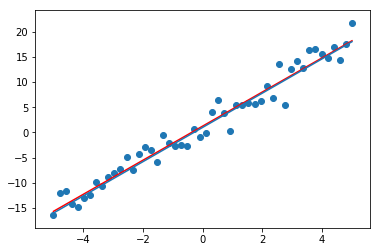

In [6]:
print("W:",Wo,",b:",bo)
py = x*Wo+bo
plt.plot(x, py,'r-')
plt.plot(x,real_y)
plt.scatter(x,y)
plt.show()